In [118]:
import pandas as pd
import seaborn as sns
import sys
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats
import re
import math

numberOfTasks = 25
confideceInterval = 95
z = 1.960
numberOfLanguages = 14
totalFields = numberOfTasks*numberOfLanguages
tasksNames=['ackermann','array-concat', 'call-obj-method', 'classes','concurrent-comp.', 'exponentiation-operator','factorial','file-I/O','function-composition' ,'huffman', 'inherit,-multi.','inherit.-single','json','lzw-compression','numerical-integration','palindrome','regex','bubble-sort','insertion-sort','merge-sort','quick-sort','selection-sort','synchronous-concurrency','url-decoding','url-encoding']

#Initializing Arrays
langaugesEDP=[""  for x in range(totalFields)]
counter=0      
with open('arm/Normalized_EDP_1.txt') as f:
    for line in f:
        line = line.replace(":","")
        line = line.replace(",","")
        #line = line.replace("-1","NaN")
        data = re.split('\s+', line)
        data.pop(0)
        for i in range(numberOfLanguages):
            langaugesEDP[counter] = float(data[i])
            counter += 1
            
correctlySortedEDP=[[0 for x in range(numberOfLanguages)] for y in range(numberOfTasks)] 
counter = 0
for i in range(numberOfTasks):
    for j in range (numberOfLanguages):
        if langaugesEDP[counter] != -1 :
            correctlySortedEDP[i][j] = langaugesEDP[counter]
        else:
            correctlySortedEDP[i][j] = np.nan
        counter += 1 

        
for i in range(numberOfTasks):
    #Get number of samples exluding the Nan values
    numberOfSamples = 0
    for j in range(numberOfLanguages):
            if not np.isnan(correctlySortedEDP[i][j]):
                numberOfSamples += 1
    print("Task Name:",tasksNames[i]," Mean:",str(round(np.nanmean(correctlySortedEDP[i]),2))," Interval: +/-",str(round(z * (float(np.nanstd(correctlySortedEDP[i])) / math.sqrt(numberOfSamples)),2)))
        

Task Name: ackermann  Mean: 1.84  Interval: +/- 0.84
Task Name: array-concat  Mean: 2.39  Interval: +/- 0.63
Task Name: call-obj-method  Mean: 3.18  Interval: +/- 1.14
Task Name: classes  Mean: 2.59  Interval: +/- 0.83
Task Name: concurrent-comp.  Mean: 2.6  Interval: +/- 0.85
Task Name: exponentiation-operator  Mean: 3.62  Interval: +/- 1.23
Task Name: factorial  Mean: 2.07  Interval: +/- 0.71
Task Name: file-I/O  Mean: 0.83  Interval: +/- 0.6
Task Name: function-composition  Mean: 4.56  Interval: +/- 1.03
Task Name: huffman  Mean: 2.11  Interval: +/- 0.55
Task Name: inherit,-multi.  Mean: 1.81  Interval: +/- 2.01
Task Name: inherit.-single  Mean: 0.85  Interval: +/- 0.76
Task Name: json  Mean: 1.79  Interval: +/- 0.76
Task Name: lzw-compression  Mean: 4.31  Interval: +/- 1.12
Task Name: numerical-integration  Mean: 2.51  Interval: +/- 0.92
Task Name: palindrome  Mean: 2.29  Interval: +/- 0.54
Task Name: regex  Mean: 1.94  Interval: +/- 0.72
Task Name: bubble-sort  Mean: 2.02  Interva

We read our data using pandas.

In [58]:
import pandas as pd

edp_df = pd.read_table("arm/Normalized_EDP_1.txt", delim_whitespace=True, header=None, na_values=-1)
edp_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,ackermann-function:,0.86,0.16,0.16,0.00,0.75,2.53,3.31,3.73,3.79,4.78,3.10,0.41,0.20,2.02
1,array-concatenation:,2.07,0.00,0.25,2.07,1.78,3.68,3.35,2.47,2.96,4.35,2.70,2.01,3.82,2.01
2,call-an-object-method:,4.64,0.00,0.00,2.06,0.67,5.28,4.99,5.13,5.63,5.41,4.94,3.29,2.44,0.01
3,classes:,1.86,0.00,1.43,1.31,0.00,2.68,5.11,3.40,4.53,4.77,3.57,1.79,2.26,3.49
4,concurrent-computing:,1.36,0.00,3.94,0.22,NaN,3.03,4.79,NaN,3.08,NaN,3.09,3.65,3.22,2.19


This is not in a format we can use, so we need to:

* Transpose the table so that the tasks are the different columns.

* Moreover, the task names end in `:`, so we should take care of that because it's ugly.

In [59]:
edp_df = edp_df.set_index(0).transpose()
edp_df.rename(lambda x: x[:-1], axis='columns', inplace=True)
edp_df

,ackermann-function,array-concatenation,call-an-object-method,classes,concurrent-computing,exponentiation-operator,factorial,file-input-output,function-composition,huffman-coding,...,palindrome-detection,regular-expressions,sorting-algorithms-bubble-sort,sorting-algorithms-insertion-sort,sorting-algorithms-merge-sort,sorting-algorithms-quick-sort,sorting-algorithms-selection-sort,synchronous-concurrency,url-decoding,url-encoding
1,0.86,2.07,4.64,1.86,1.36,3.53,1.50,0.17,5.30,1.87,...,2.35,3.29,0.06,0.80,2.54,0.18,0.31,0.03,4.03,1.82
2,0.16,0.00,0.00,0.00,0.00,0.00,0.56,0.62,4.12,0.00,...,0.30,2.03,0.48,0.19,2.12,0.31,0.54,0.00,0.00,1.15
3,0.16,0.25,0.00,1.43,3.94,0.99,0.61,0.44,0.00,1.41,...,2.02,1.31,0.34,0.46,1.72,0.49,0.81,0.00,0.95,1.03
4,0.00,2.07,2.06,1.31,0.22,1.76,0.48,0.05,5.14,1.38,...,2.77,3.57,0.00,0.03,0.00,0.00,0.00,0.11,3.74,3.64
5,0.75,1.78,0.67,0.00,NaN,2.09,1.28,2.11,3.30,1.79,...,2.25,0.00,0.78,0.00,3.63,3.08,0.41,NaN,3.28,0.82
6,2.53,3.68,5.28,2.68,3.03,4.65,2.82,1.89,6.90,1.51,...,2.77,3.89,2.57,2.09,3.87,2.20,2.34,0.00,6.36,4.21
7,3.31,3.35,4.99,5.11,4.79,6.18,3.73,0.16,5.27,2.55,...,3.50,0.78,2.81,3.37,5.13,3.34,3.30,0.58,4.15,0.68
8,3.73,2.47,5.13,3.40,NaN,4.28,4.04,0.12,4.28,1.91,...,2.09,0.17,3.54,3.87,5.44,4.12,3.93,NaN,2.75,0.00
9,3.79,2.96,5.63,4.53,3.08,6.78,2.92,0.18,4.57,2.07,...,2.29,1.70,3.61,2.75,3.98,3.75,3.61,0.16,5.04,2.76
10,4.78,4.35,5.41,4.77,NaN,6.85,3.41,0.85,5.23,2.66,...,3.67,3.15,4.85,5.14,6.53,4.34,3.93,NaN,5.24,7.38


We can now get an overview of what is going on.

In [60]:
edp_df.describe()

,ackermann-function,array-concatenation,call-an-object-method,classes,concurrent-computing,exponentiation-operator,factorial,file-input-output,function-composition,huffman-coding,...,palindrome-detection,regular-expressions,sorting-algorithms-bubble-sort,sorting-algorithms-insertion-sort,sorting-algorithms-merge-sort,sorting-algorithms-quick-sort,sorting-algorithms-selection-sort,synchronous-concurrency,url-decoding,url-encoding
count,14.000000,14.000000,14.000000,14.000000,11.000000,14.000000,14.000000,14.000000,13.000000,14.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,10.000000,14.000000,14.000000
mean,1.842857,2.394286,3.177857,2.585714,2.597273,3.619286,2.067143,0.828571,4.563077,2.114286,...,2.292143,1.941429,2.025000,1.921429,3.744286,2.612857,2.074286,0.108000,3.855714,2.355714
std,1.668451,1.242106,2.254586,1.640421,1.512085,2.429056,1.413471,1.192862,1.965067,1.088674,...,1.072669,1.432404,1.674238,1.628155,1.762881,1.702109,1.573256,0.174343,1.733754,1.934058
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.252500,2.010000,1.017500,1.520000,1.775000,1.842500,0.750000,0.130000,4.120000,1.580000,...,2.115000,0.750000,0.375000,0.462500,2.607500,0.917500,0.495000,0.007500,3.297500,0.962500
50%,1.440000,2.270000,3.965000,2.470000,3.080000,3.505000,2.065000,0.310000,4.840000,1.990000,...,2.275000,1.865000,2.480000,2.075000,3.925000,3.005000,2.345000,0.050000,4.090000,2.065000
75%,3.257500,3.252500,5.095000,3.550000,3.435000,5.797500,3.287500,0.820000,5.270000,2.532500,...,2.770000,3.255000,3.432500,2.915000,5.025000,3.892500,3.532500,0.107500,5.020000,3.420000
max,4.780000,4.350000,5.630000,5.110000,4.790000,6.850000,4.040000,4.260000,7.970000,4.950000,...,3.670000,3.890000,4.850000,5.140000,6.530000,5.000000,3.990000,0.580000,6.360000,7.380000


It's straightforward to obtain 5% and 95% quantiles.

In [61]:
edp_df.quantile([0.05, 0.95])

,ackermann-function,array-concatenation,call-an-object-method,classes,concurrent-computing,exponentiation-operator,factorial,file-input-output,function-composition,huffman-coding,...,palindrome-detection,regular-expressions,sorting-algorithms-bubble-sort,sorting-algorithms-insertion-sort,sorting-algorithms-merge-sort,sorting-algorithms-quick-sort,sorting-algorithms-selection-sort,synchronous-concurrency,url-decoding,url-encoding
0.05,0.1040,0.1625,0.000,0.000,0.110,0.0000,0.3120,0.0130,1.440,0.897,...,0.195,0.0715,0.039,0.0195,1.1180,0.117,0.2015,0.000,0.6175,0.4420
0.95,4.1365,4.0055,5.487,4.889,4.365,6.8045,3.8775,2.8625,7.328,3.637,...,3.644,3.6820,4.122,4.3145,5.9125,4.571,3.9510,0.391,5.6580,5.3195


To get the confidence intervals for the mean values, we need some more work.

In [62]:
#https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data

import numpy as np
import scipy as sp
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, h, m-h, m+h

In [63]:
edp_df.apply(lambda x: mean_confidence_interval(x.dropna()), axis=0)

0
ackermann-function                   (1.842857142857143, 0.9633350879964571, 0.8795...
array-concatenation                  (2.3942857142857146, 0.7171704338902158, 1.677...
call-an-object-method                (3.1778571428571425, 1.301759016195446, 1.8760...
classes                              (2.585714285714286, 0.947150739369225, 1.63856...
concurrent-computing                 (2.597272727272727, 1.0158326964792326, 1.5814...
exponentiation-operator              (3.619285714285715, 1.402495391235771, 2.21679...
factorial                            (2.067142857142857, 0.8161135788478692, 1.2510...
file-input-output                    (0.8285714285714285, 0.6887382866510688, 0.139...
function-composition                 (4.563076923076923, 1.1874783232617225, 3.3755...
huffman-coding                       (2.1142857142857143, 0.628581629747498, 1.4857...
inheritance-multiple                 (1.8085714285714285, 2.709016325085424, -0.900...
inheritance-single                   (0.8

Unfortunately, these values may make no sense, because we don't know whether the distributions are normally distributed (in fact, as we are dealing with the logarithms, we don't know whether the logarithms of the values are normally distributed; in other words, whether the original distributions are lognormal).

To check that we can use the Kolmogorov-Smirnov test.

In [74]:
import scipy

from scipy import stats

edp_df.apply(lambda x: stats.kstest(x.dropna(), 'norm'))

0
ackermann-function                                   (0.5, 0.0009240161485983833)
array-concatenation                   (0.8196048767943405, 8.430833808859006e-11)
call-an-object-method                 (0.6945864438763374, 2.829747047794484e-07)
classes                               (0.7620449393476181, 5.416739723429487e-09)
concurrent-computing                 (0.7312668562347331, 1.5851767767305347e-06)
exponentiation-operator               (0.746510382426803, 1.4499528022682284e-08)
factorial                             (0.612957732055206, 1.3817626965506591e-05)
file-input-output                                    (0.5, 0.0009240161485983833)
function-composition                 (0.9148793871523269, 2.4646951146678475e-14)
huffman-coding                        (0.8447781061564142, 9.664491429361988e-12)
inheritance-multiple                                   (0.5, 0.03839174153626468)
inheritance-single                                    (0.5, 0.004565178595441921)
json          

So it's only the `inheritance-multiple` task with a $p$-value that indicates that we cannot reject the hypothesis that it is lognormally distributed. For all others we must reject the hypothesis.

Perhaps a graph would be more informative.

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt


In [76]:
melted_df = edp_df.melt()
melted_df.head()

,0,value
0,ackermann-function,0.86
1,ackermann-function,0.16
2,ackermann-function,0.16
3,ackermann-function,0.00
4,ackermann-function,0.75


In [77]:
melted_df.rename({0: 'task'}, axis='columns', inplace=True)
melted_df.head()

,task,value
0,ackermann-function,0.86
1,ackermann-function,0.16
2,ackermann-function,0.16
3,ackermann-function,0.00
4,ackermann-function,0.75


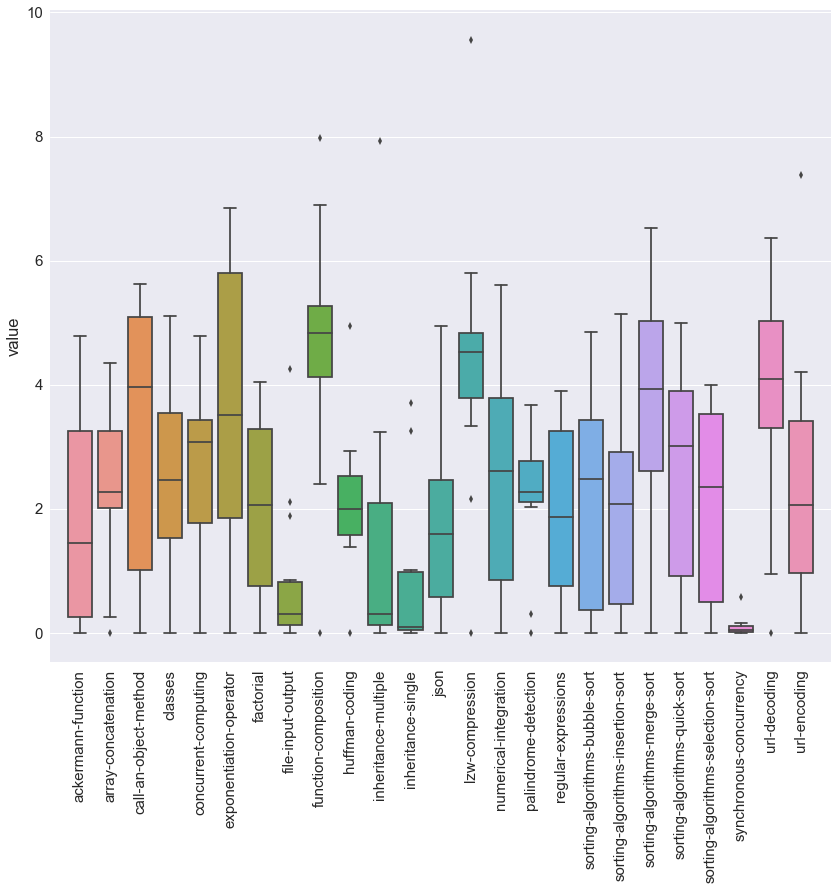

In [96]:
fig, ax = plt.subplots()

sns.set(font_scale=1.5)
fig.set_size_inches(14, 12)
g = sns.boxplot(x="task", y="value", data=melted_df)
ticklabels = g.get_xticklabels()
x_lim = g.get_xlim()
g.set_xlim(x_lim[0] - 0.5, x_lim[1] + 0.5)
_ = g.set_xticklabels(ticklabels, rotation=90)
ax.set_xlabel('')
fig.savefig('boxplots.pdf', bbox_inches='tight')